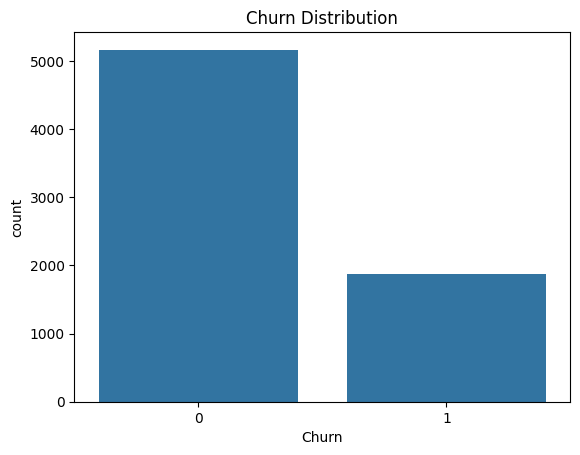

Churn rate: 26.58%


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/telco_cleaned.csv")

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

churn_rate = df['Churn'].mean()
print(f"Churn rate: {churn_rate:.2%}")

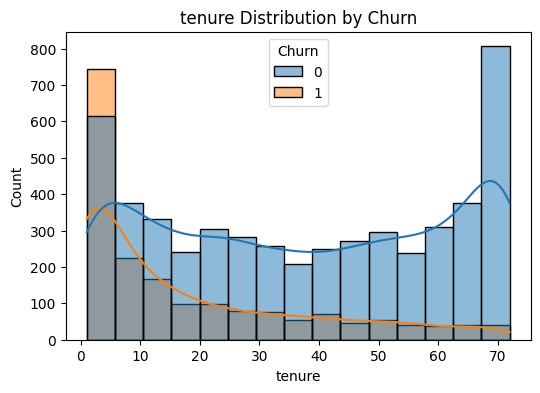

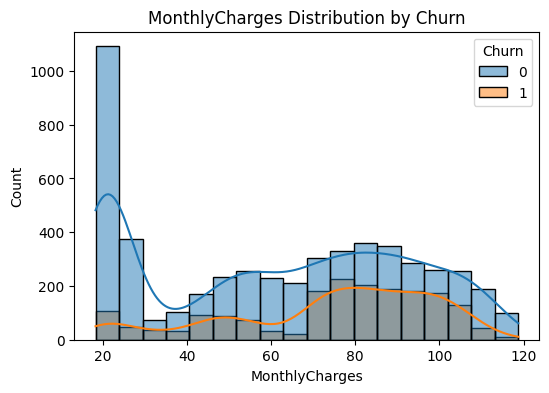

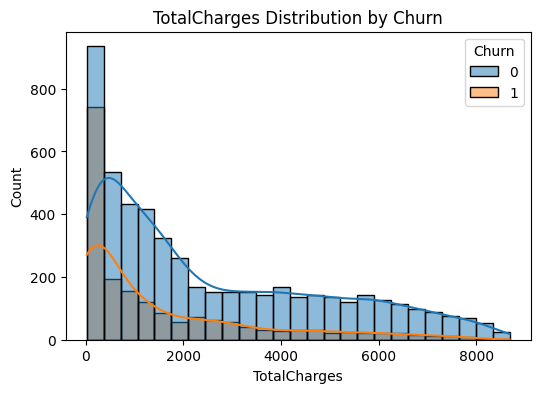

In [2]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'{col} Distribution by Churn')
    plt.show()

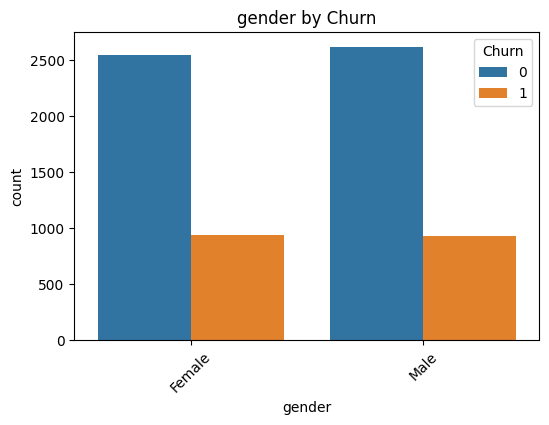

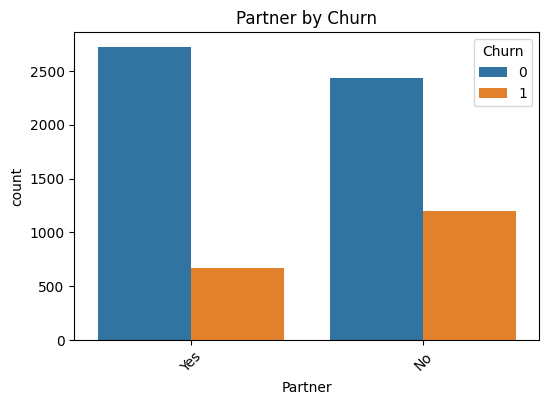

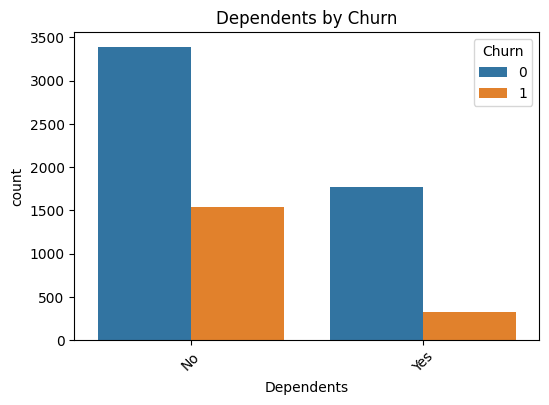

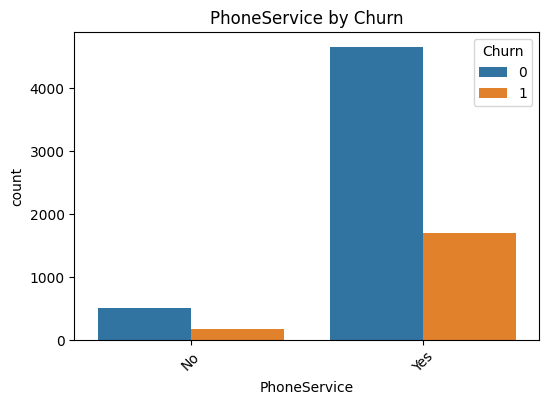

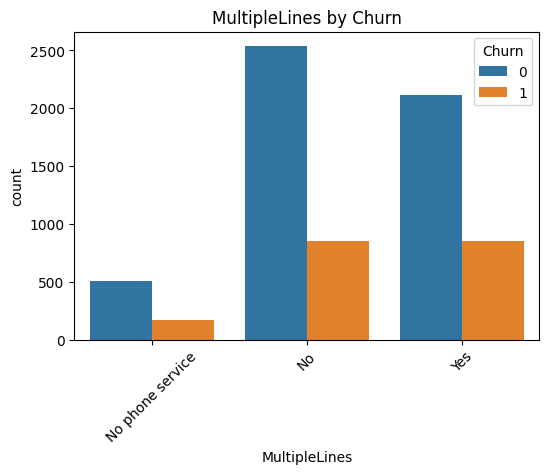

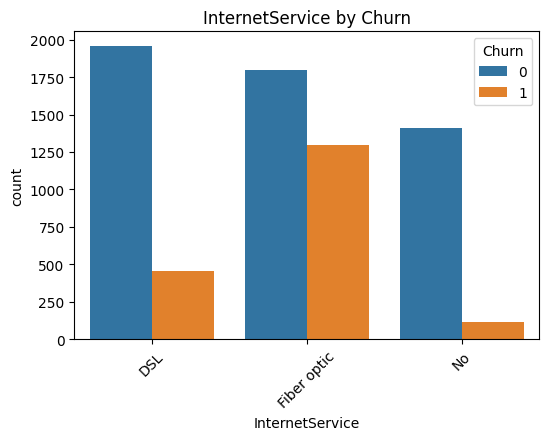

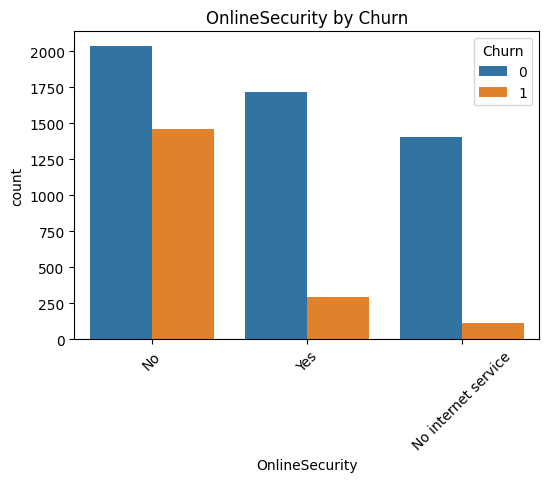

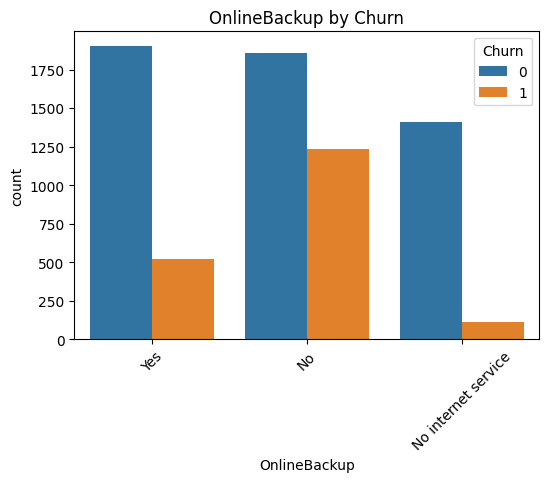

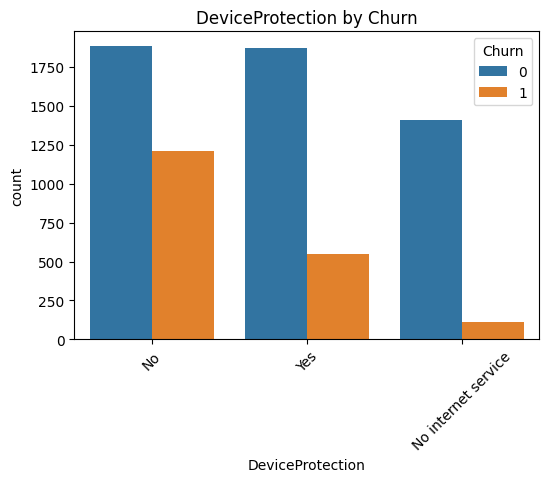

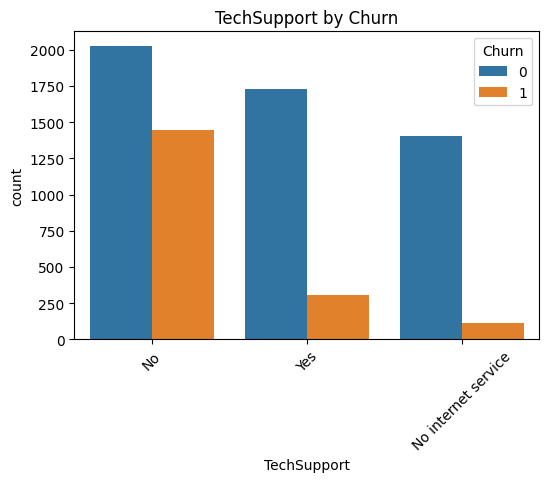

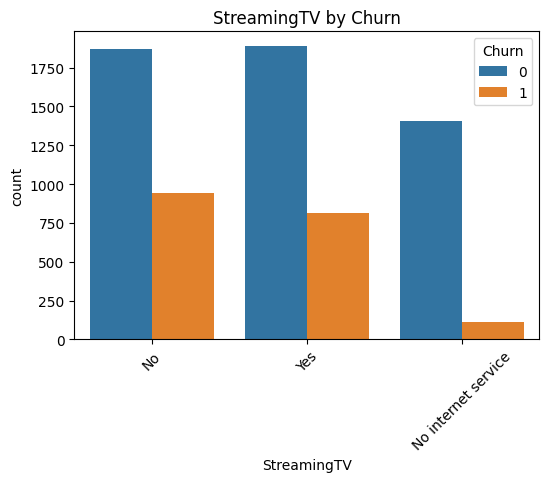

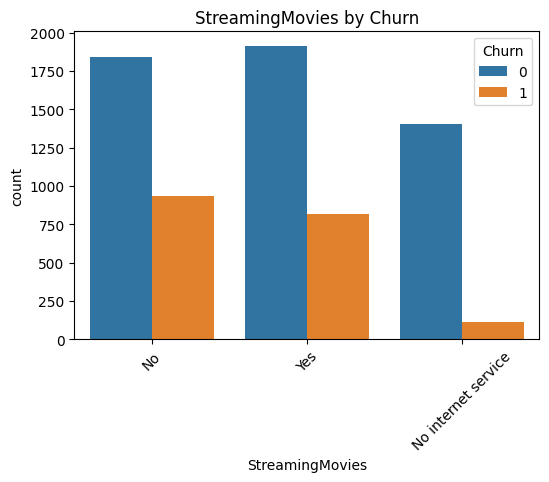

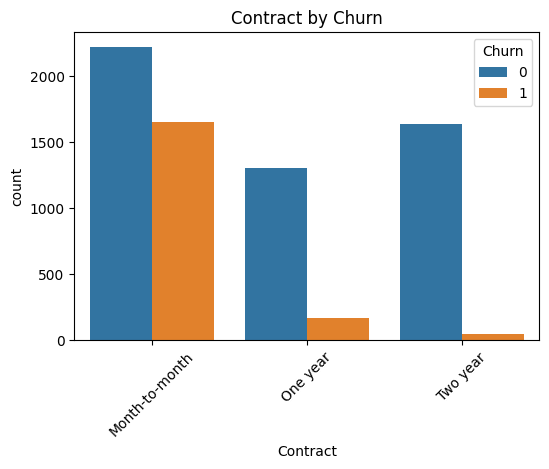

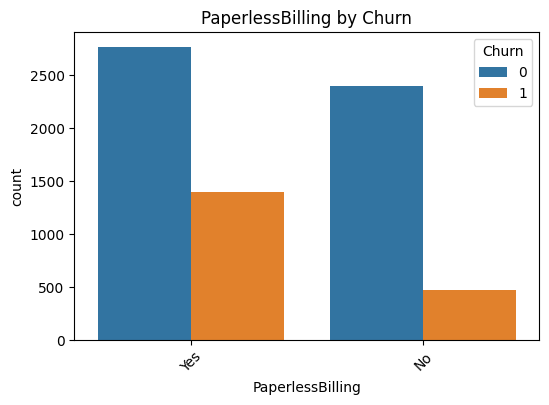

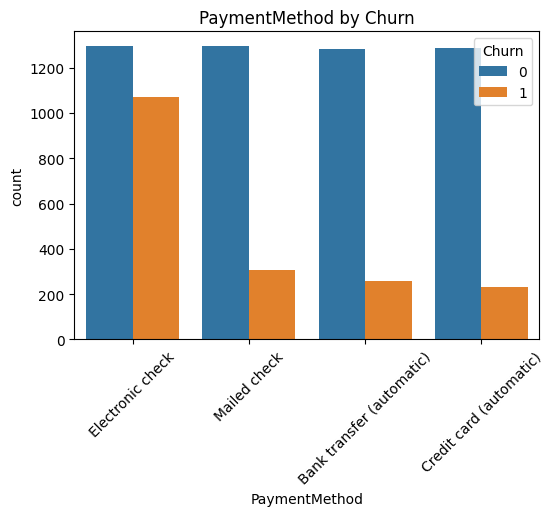

In [3]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'{col} by Churn')
    plt.show()

In [4]:
yes_no_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [5]:
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['NumServices'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)

In [6]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [7]:
# cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# cat_cols.remove('customerID')

cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'TenureGroup']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [8]:
print(df.shape)
print(df.columns)
print(df.isnull().sum().sum())  # should be 0

(7032, 36)
Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'NumServices', 'Partner_1', 'Dependents_1',
       'PhoneService_1', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_1',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureGroup_1-2 years', 'TenureGroup_2-4 years',
       'TenureGroup_4-5 years', 'TenureGroup_5+ years'],
      dtype

In [9]:
df.to_csv("../data/telco_processed.csv", index=False)